# Picking Data from file

In [1]:
!pip install pandas


DEPRECATION: Loading egg at c:\users\sa\appdata\local\programs\python\python312\lib\site-packages\yapf-0.40.2-py3.12.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [3]:
import os
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
import joblib

# Function to load and concatenate CSV files from a folder
def load_csv_files(folder_path):
    dataframes = []
    for file_name in os.listdir(folder_path):
        if file_name.endswith(".csv"):
            label = file_name.split(".")[0]  # Use the file name (without extension) as the label
            df = pd.read_csv(os.path.join(folder_path, file_name))
            df['label'] = label  # Add a label column
            dataframes.append(df)
    return pd.concat(dataframes, ignore_index=True)

# Load dataset
data_folder = r"data"
df = load_csv_files(data_folder)

# columns for features and labels
selected_columns = ["Flex1", "Flex2", "Flex3", "Flex4", "Flex5", 
                    "AccelX", "AccelY", "AccelZ", "GyroX", "GyroY", "GyroZ", "label"]

# Ensure selected columns exist
df = df[selected_columns]

# Handle missing values
df = df.dropna()

# Data Analysis

In [4]:
# Analyze feature distribution for the label 'hellow'
label_hellow_count = df[df['label'] == 'hello'].shape[0]
print(f"Number of instances of label 'hellow': {label_hellow_count}")

df.head()

Number of instances of label 'hellow': 0


,Flex1,Flex2,Flex3,Flex4,Flex5,AccelX,AccelY,AccelZ,GyroX,GyroY,GyroZ,label
0,790,792,805,778,772,-1.45,1.88,10.64,-0.57,1.21,0.41,a
1,784,784,793,774,771,-3.19,1.33,10.11,0.29,1.10,-0.05,a
2,775,777,785,767,769,-3.21,2.02,9.56,0.04,0.30,0.08,a
3,772,775,782,767,767,-3.26,1.76,9.42,-0.68,0.11,0.32,a
4,776,776,785,769,768,-3.88,1.29,9.48,-0.03,-0.19,-0.07,a


In [5]:
# Display label counts
label_counts = df["label"].value_counts()
label_counts

label
Yes           1286
No             973
I_Love_You     896
Hello          895
f              800
c              797
e              700
Now            699
Awkward        694
Sorry          673
Bathroom       672
d              667
Deaf           665
Goodbye        664
a              662
b              653
Name: count, dtype: int64

In [6]:
# Split into features (X) and labels (y)
X = df[["Flex1", "Flex2", "Flex3", "Flex4", "Flex5", "AccelX", "AccelY", "AccelZ", "GyroX", "GyroY", "GyroZ"]]
y = df["label"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# Perform hyperparameter tuning with GridSearchCV
param_grid = {
    "n_estimators": [50, 100, 150],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

grid_search = GridSearchCV(rf, param_grid, cv=3, n_jobs=-1, scoring="accuracy", verbose=2)
grid_search.fit(X_train, y_train)

# Best model from grid search
best_rf = grid_search.best_estimator_

# Train the model with the best parameters
best_rf.fit(X_train, y_train)

# Save the trained model
joblib.dump(best_rf, "rf_model.pkl")

Fitting 3 folds for each of 81 candidates, totalling 243 fits


['rf_model.pkl']

# Model Evaluation

Model Accuracy: 0.9826612903225806

Classification Report:
               precision    recall  f1-score   support

     Awkward       1.00      0.96      0.98       140
    Bathroom       1.00      1.00      1.00       149
        Deaf       1.00      1.00      1.00       136
     Goodbye       0.99      1.00      1.00       129
       Hello       0.97      0.98      0.98       170
  I_Love_You       0.95      0.96      0.95       198
          No       0.94      0.95      0.94       202
         Now       0.99      0.98      0.98       130
       Sorry       1.00      1.00      1.00       132
         Yes       0.96      0.98      0.97       231
           a       1.00      0.96      0.98       140
           b       1.00      1.00      1.00       132
           c       0.99      0.99      0.99       156
           d       1.00      1.00      1.00       132
           e       1.00      0.99      0.99       153
           f       0.99      1.00      1.00       150

    accuracy        

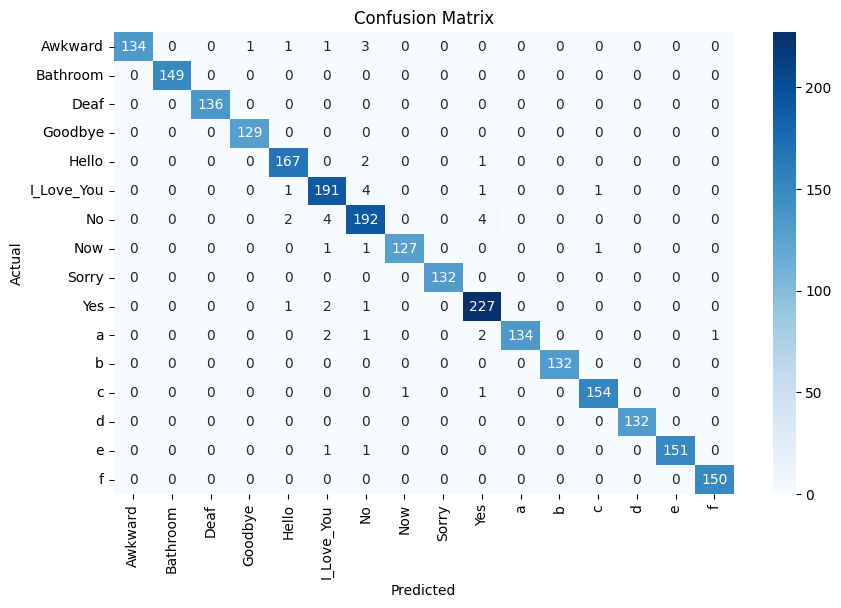

Precision: 0.9829256342781658
Recall: 0.9826612903225806
F1 Score: 0.9827088199565449


In [9]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluate the model on the test set
y_pred = best_rf.predict(X_test)
y_pred_proba = best_rf.predict_proba(X_test)  # For ROC-AUC, if applicable

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy}")

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=best_rf.classes_, yticklabels=best_rf.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Precision, Recall, F1-Score
precision = precision_score(y_test, y_pred, average="weighted")
recall = recall_score(y_test, y_pred, average="weighted")
f1 = f1_score(y_test, y_pred, average="weighted")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# ROC-AUC (only for binary classification)
if len(y.unique()) == 2:
    roc_auc = roc_auc_score(y_test, y_pred_proba[:, 1])
    print(f"ROC-AUC Score: {roc_auc}")
